In [360]:
# ! pip install sklearn jupyter pandas category-encoders

 _____________________________________ 
/ We don't care how they do it in New \
\ York.                               /
 ------------------------------------- 
     \ 
      \                       
       \                       
                                
                                
                                
                                
                              
                              
                            
                            
                              
                                
                                  
                                    
                                     
                                      
                                      
                                      
                                      
                                      
                                      
                                      
                                      
                               

In [344]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [345]:
FOLDER_NAME = "titanic"

test_X = pd.read_csv(os.path.join(FOLDER_NAME, "test.csv"))
train = pd.read_csv(os.path.join(FOLDER_NAME, "train.csv"))

# Drop useless cols
drop_cols = ["Name", "PassengerId"]
test_X = test_X.drop(columns=drop_cols)
train = train.drop(columns=drop_cols)

train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [346]:
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test dataset has {test.shape[0]} rows and {test_X.shape[1]} columns.')

Train dataset has 891 rows and 10 columns.
Test dataset has 418 rows and 9 columns.


In [347]:
print(train.isna().sum() / train.shape[0])
print("-" * 25)
print(test.isna().sum() / test.shape[0])

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64
-------------------------
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
SexEnc         0.000000
dtype: float64


Most columns are full and both test and train datasets have same distribution of NaN values.

In [348]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


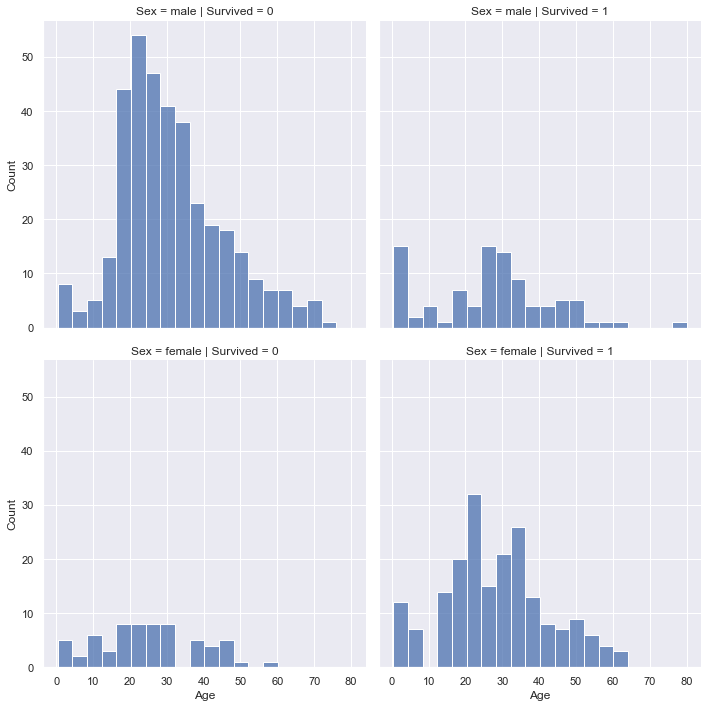

In [349]:
# Lets explore the data
sns.set_theme(style="darkgrid")
sns.displot(train, x="Age", col="Survived", row="Sex")

As you can see females were more likely to survive rather than males from titanic

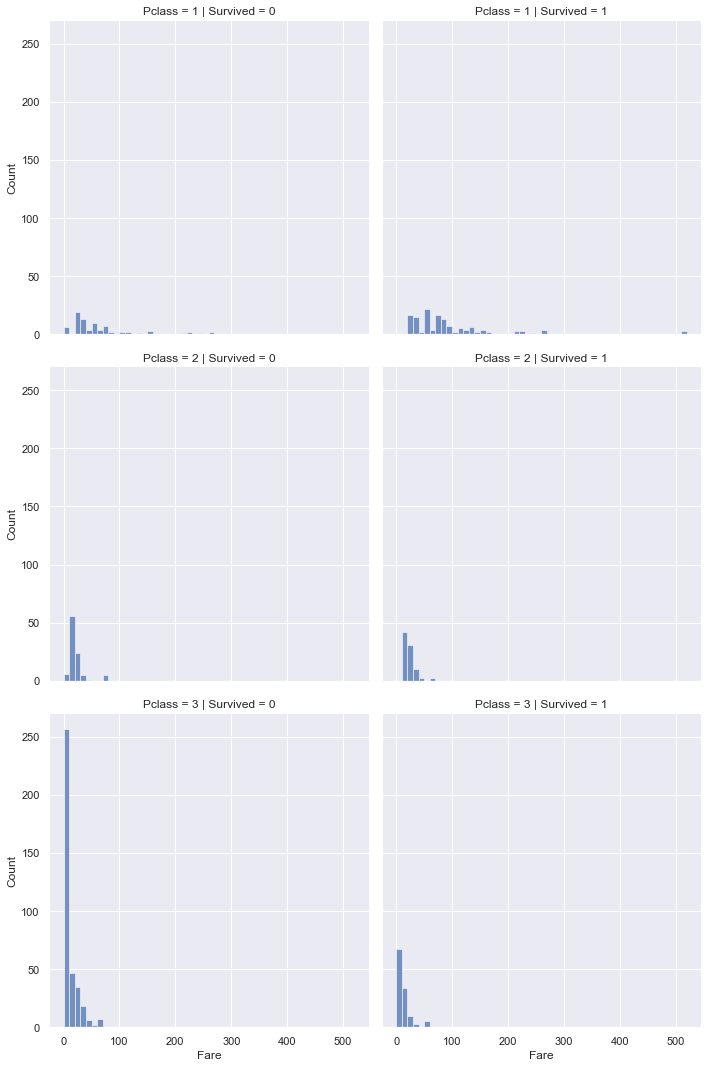

In [350]:
sns.displot(train, x="Fare", col="Survived", row="Pclass", binwidth=10)

Looks like the kids didnt survive the titanic either

In [351]:
print(train_Y.value_counts())

0    549
1    342
Name: Survived, dtype: int64


Dataset is not horribly imbalanced

In [352]:
train_Y = train["Survived"]
train_X = train.drop(columns="Survived")
del train

In [353]:
# Lets binary encode the sex values

label_encoder = LabelEncoder().fit(train_X["Sex"])
train_X["SexEnc"] = label_encoder.transform(train_X["Sex"])
train_X = train_X.drop(columns="Sex")
test_X["SexEnc"] = label_encoder.transform(test_X["Sex"])
test_X = test_X.drop(columns="Sex")

del label_encoder
train_X

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexEnc
0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,35.0,1,0,113803,53.1000,C123,S,0
4,3,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,211536,13.0000,NaN,S,1
887,1,19.0,0,0,112053,30.0000,B42,S,0
888,3,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,1,26.0,0,0,111369,30.0000,C148,C,1


In [354]:
print(f"There are {train_X['Embarked'].isna().sum()} NaN values in train_X['Embarked']")


There are 2 NaN values in train_X['Embarked']


Let us convert NaN to most frequent value for "Embarked" since it is 2/890 which is insignificant. Then we can one-hot encode the "Embarked" value.

In [355]:

def onehot_encode_embarked(train_X, test_X):
    train_embarked = train_X["Embarked"].to_numpy().reshape(-1, 1)
    test_embarked = test_X["Embarked"].to_numpy().reshape(-1, 1)

    train_embarked = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(train_embarked)
    test_embarked = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(test_embarked)

    onehot_encoder = OneHotEncoder(sparse=False).fit(train_embarked)
    train_embarked_enc = onehot_encoder.transform(train_embarked)
    test_embarked_enc = onehot_encoder.transform(test_embarked)

    # Sanity check to see that data is encoded the same way in test and train
    print(test_embarked_enc[0], test_embarked[0])
    print(train_embarked_enc[0], train_embarked[0])
    categories = [f"Embarked_{c}" for c in onehot_encoder.categories_[0]]

    train_emb_df = pd.DataFrame(data=train_embarked_enc, columns=categories)
    test_emb_df = pd.DataFrame(data=test_embarked_enc, columns=categories)

    train_X = pd.concat([train_X, train_emb_df], axis=1).drop(columns="Embarked")
    test_X = pd.concat([test_X, test_emb_df], axis=1).drop(columns="Embarked")
    return train_X, test_X

train_X, test_X = onehot_encode_embarked(train_X, test_X)


train_X

[0. 1. 0.] ['Q']
[0. 0. 1.] ['S']


,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,SexEnc,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,A/5 21171,7.2500,NaN,1,0.0,0.0,1.0
1,1,38.0,1,0,PC 17599,71.2833,C85,0,1.0,0.0,0.0
2,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0.0,0.0,1.0
3,1,35.0,1,0,113803,53.1000,C123,0,0.0,0.0,1.0
4,3,35.0,0,0,373450,8.0500,NaN,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,211536,13.0000,NaN,1,0.0,0.0,1.0
887,1,19.0,0,0,112053,30.0000,B42,0,0.0,0.0,1.0
888,3,NaN,1,2,W./C. 6607,23.4500,NaN,0,0.0,0.0,1.0
889,1,26.0,0,0,111369,30.0000,C148,1,1.0,0.0,0.0


In [356]:
print(f"There are {train_X['Age'].isna().sum()} NaN values in train_X[Age]")
print(f"There are {train_X['Fare'].isna().sum()} NaN values in train_X[Fare]")
print(f"The mean for SexEnc == 1 is {train_X[train_X['SexEnc'] == 1]['Age'].mean()}")
print(f"The mean for SexEnc == 0 is {train_X[train_X['SexEnc'] == 0]['Age'].mean()}")

There are 177 NaN values in train_X[Age]
There are 0 NaN values in train_X[Fare]
The mean for SexEnc == 1 is 30.72664459161148
The mean for SexEnc == 0 is 27.915708812260537


Let us replace the missing ages with different means for males and females

In [357]:
mask_1 = train_X['SexEnc'] == 1 & train_X['Age'].isna()
train_X["Age"] = train_X["Age"].mask(cond=mask_1, 
                                     other=train_X[train_X['SexEnc'] == 1]['Age'].mean())

mask_2 = train_X['SexEnc'] == 0 & train_X['Age'].isna()
train_X["Age"] = train_X["Age"].mask(cond=mask_2, 
                                     other=train_X[train_X['SexEnc'] == 0]['Age'].mean())

print(f"There are {train_X['Age'].isna().sum()} NaN values in train_X[Age]")
train_X

There are 0 NaN values in train_X[Age]


,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,SexEnc,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,A/5 21171,7.2500,NaN,1,0.0,0.0,1.0
1,1,30.726645,1,0,PC 17599,71.2833,C85,0,1.0,0.0,0.0
2,3,30.726645,0,0,STON/O2. 3101282,7.9250,NaN,0,0.0,0.0,1.0
3,1,30.726645,1,0,113803,53.1000,C123,0,0.0,0.0,1.0
4,3,35.000000,0,0,373450,8.0500,NaN,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,211536,13.0000,NaN,1,0.0,0.0,1.0
887,1,30.726645,0,0,112053,30.0000,B42,0,0.0,0.0,1.0
888,3,30.726645,1,2,W./C. 6607,23.4500,NaN,0,0.0,0.0,1.0
889,1,26.000000,0,0,111369,30.0000,C148,1,1.0,0.0,0.0


In [358]:
print(f"There are {train_X['Ticket'].nunique()} unique values in Ticket column")

There are 681 unique values in Ticket column


One-hot/base-k style encoding it would make the number of features very high. This would impact our ML performance. This would be the perfect candidate for Target Encoding. 

Read this [blog](https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64) to get a better understanding.

In [359]:


# clf = DecisionTreeClassifier(random_state=0)
# clf.fit(train_X, train_Y)

# Y_pred = clf.predict(test_X)
# print(confusion_matrix(Y, Y_pred))
